In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

delhivery_data = pd.read_csv("delhivery_data.csv")
pd.DataFrame(delhivery_data)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [4]:
dd = delhivery_data.copy()

In [5]:
df = dd.dropna()

In [1]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df['segment_key'] = df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']
for col in segment_cols:
   df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

NameError: name 'df' is not defined

In [7]:
segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
 }
 # Grouping by segment_key and aggregating
segment_agg_data = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data


,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


In [8]:
de = segment_agg_data.copy()

In [13]:
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None


In [14]:
de[['destination_city', 'destination_place', 'destination_state']] = de['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [9]:
cp = ['gray','red','orange','tomato','yellow','orangered','k','salmon','pink','red','green','tomato','cyan','orangered','k','salmon']

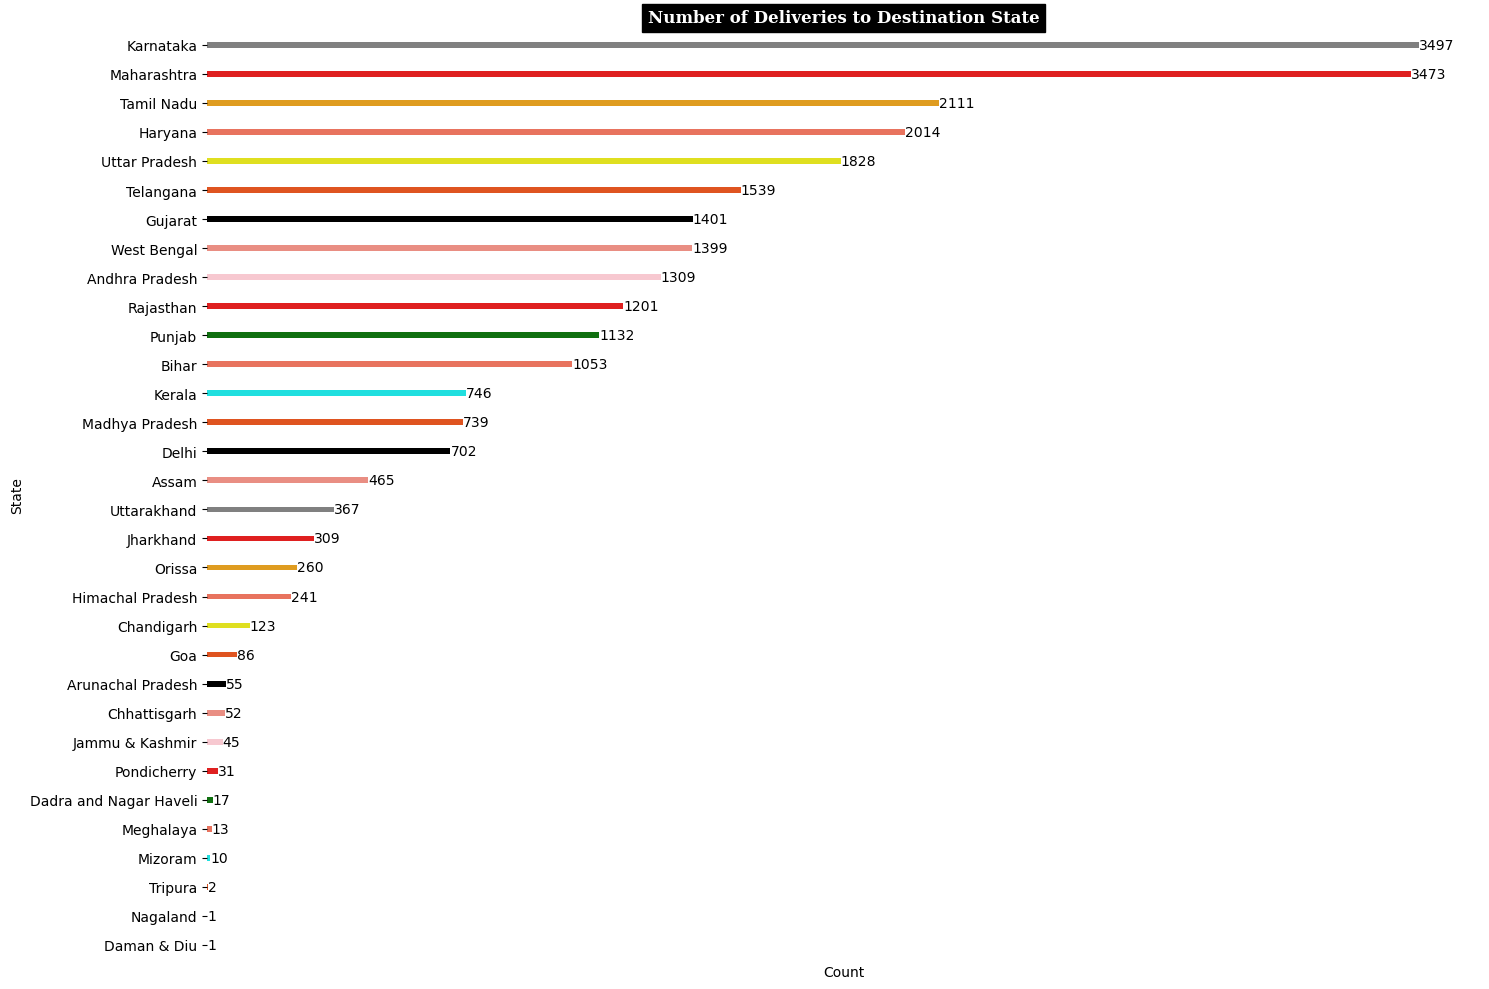

In [15]:
state_counts = de['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()